<a href="https://colab.research.google.com/github/rajeevak40/Text_Analytics/blob/main/Document_Scanning_and_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective
The main objective this project is resume scanning, where the resume is compared with the job description given by recruiter is compared with candidate’s resume.

## Procedure

1.	Upload the files ie; Job description and Candidate’s resume.
2.	Preprocess the data using Regex 
3.	Performing Text analytics.
4.	Computing similarity scores using various text analysis tool.
5.	Comparing the score for conclusion.




In [1]:
!pip install docx2txt --upgrade --quiet
!pip install cufflinks --upgrade --quiet
!pip install textblob  --upgrade --quiet

In [45]:
# Importing required libraries
import cufflinks as cf
import textblob as textblob
import seaborn as sn
import docx2txt
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import wordnet
from nltk.util import ngrams
nltk.download('wordnet')
from gensim.parsing.preprocessing import remove_stopwords
import regex
import re
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
from google.colab import files
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Loading Data

In [3]:
# Loading Data 
print("Choose the files to be compared :")
uploaded_files=files.upload()

Choose the files to be compared :


Saving JD (1).docx to JD (1).docx
Saving JD.docx to JD.docx


In [4]:
keys=list(uploaded_files.keys())

In [5]:
# Storing documets to variables
docs=[]
for key in keys:
  try:
    docs.append(docx2txt.process(key))
  except:
    print("Need a file with docx extension, hence '{}' can not be used".format(key))
print( "Number of files converted are  : "+ str(len(docs)))

Number of files converted are  : 2


### PreProcessing Data using Regex

#### Some of the common text preprocessing / cleaning steps are:

Lower casing:

This is most common and first step towards data cleaning, lower casing helps in text featurization techniques like frequency, tfidf,  reducing the duplication and get correct counts. However, lower casing will not help in  case of task like Speech Tagging or sentiment Analysis. Lower casing is done by default in vectorizers and tokenizers
  

In [6]:
# Converting document to lower case
text=[]
for doc in docs:
  text.append(doc.lower())


Removal of Stopwords and Punctuations : 

Another common text preprocessing technique is removal  the punctuations from the document. This is standardization process where punctuations such as “!"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`” are excluded depending on the use case. 

Stopwords on other hand are commonly found words like 'the', 'a', ‘an’ , etc. .They can be removed from the text as they do not provide valuable information. In case of Speech tagging, stop words give very valuable information. Stop-words are already listed for english language in nltk package


In [7]:
 # Removing puchuations form the text
text_1=[]
for doc in text:
  text_1.append(re.sub(r'[^\w\s]','',doc))

In [8]:
# Getting rid of stopwords
text_2=[]
for doc in text_1:
  text_2.append(remove_stopwords(doc))


Stemming

Stemming is the process of reducing inflected words to their word stem, base or root form. There are several type of stemming algorithms of which porter stemmer is famous. This is avaiable in NLTK package.

In [9]:
stemmer = PorterStemmer()
nltk.download('punkt')
text_1=[]

for sen in text_2:
  sentence_words = nltk.word_tokenize(sen)
  doc=[]
  for word in sentence_words:
    doc.append(stemmer.stem(word))
    doc.append(" ")
  text_1.append("".join(doc))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Lemmatization

Lemmatization is similar to stemming in reducing inflected words to their word stem but differs in the way that it makes sure the root word (also called as lemma) belongs to the language. WordNetLemmatizer is used here.


In [10]:

lemmatizer = WordNetLemmatizer()

text=[]

for sen in text_2:
  sentence_words = nltk.word_tokenize(sen)
  doc1=[]
  for word in sentence_words:
    doc1.append(lemmatizer.lemmatize(word))
    doc1.append(" ")
  text.append("".join(doc1))



Based on the out from previous two code sets it seems Lemmatization is better, hence going ahead with "text".

### Analysing documents using Text Analytics

In [11]:
i=0
for key in keys:
  print(f"Number of words in {key} is : {len(text[i].split())}")
  i=i+1

Number of words in JD (1).docx is : 658
Number of words in JD.docx is : 658


Analyzing key words in each document can be easily done by plotting them on word cloud. Word cloud quickly helps us to identify few key words which are stressed upon by the documents being reviewed. However, number of key words to be plotted is our choice.

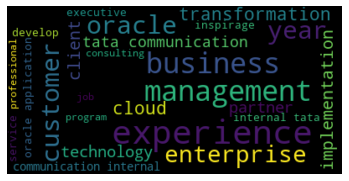

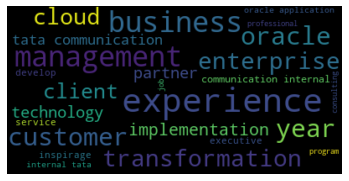

In [12]:
# Plotting word cloud with unigram
for doc in text:
  word_cloud = WordCloud(background_color="black", max_font_size=40, relative_scaling='auto',margin=2,mode ='RGBA', max_words=25 ).generate(doc)
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

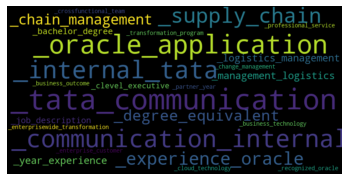

In [70]:
# Plotting word cloud with bigram
bigram_sentence=[]
for sen in text:
  bigram_words=[]
  bigrams = ngrams(sen.split(), 2)
  for grams in bigrams:
    words=''
    for gram in grams:
      words= words+'_'+gram
    bigram_words.append(words)
  bigram_sentence.append(" ".join(bigram_words))
 
 
word_cloud = WordCloud(background_color="black", max_font_size=40, relative_scaling='auto', collocations=False , margin=2,
                       mode ='RGBA', scale=2, repeat=False, max_words=25 ).generate(str(bigram_sentence))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()



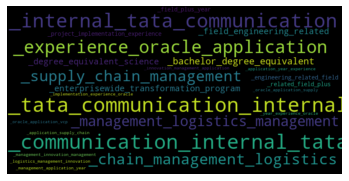

In [71]:
# Plotting word cloud with trigram
trigram_sentence=[]
for sen in text:
  trigram_words=[]
  trigrams = ngrams(sen.split(), 3)
  for grams in trigrams:
    words=''
    for gram in grams:
      words= words+'_'+gram
    trigram_words.append(words)
  trigram_sentence.append(" ".join(trigram_words))
 
 
word_cloud = WordCloud(background_color="black", max_font_size=40, relative_scaling='auto', collocations=False , margin=2,
                       mode ='RGBA', scale=2, repeat=False,max_words=25 ).generate(str(trigram_sentence))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()



### Computing Similarity Scores

Some of the most common ways of calculating similarities are Cosine Similarity, Euclidean Distance , and Jaccard Distance.
Cosine Similarity is the cosine of the angle between two vectors, which gives us the angular distance between the vectors. 
 

Euclidean Distance on other hand estimates the dissimilarity. It is one of the form of Minkowski distance.
 

Jaccard Distance is used to calculate the similarity between two finite sets. Cosine or Euclidean distance is used when the documents are represented in vector space where as Jaccard Distance is used if we consider our documents as sets or collections of words without any semantic meaning.


Hence, our computation will be basically on Cosine and Euclidean distance. 

In [72]:
# Starting with the simplest method computing Cosine Similarity using count vectorizer
cv=CountVectorizer()
count_matrix= cv.fit_transform(text)
cos_sim_matrix = cosine_similarity(count_matrix)
print(cos_sim_matrix)
cos_sim= round ((cos_sim_matrix[0][1]*100),2)

[[1. 1.]
 [1. 1.]]


In [73]:
# Simple Euclidean distance computation using count vectorizer
euc_dist_matrix = euclidean_distances(count_matrix)
print(euc_dist_matrix)
euc_dist= round(((euc_dist_matrix[0][1])*100),2)


[[0. 0.]
 [0. 0.]]


### Conclusion 

In [66]:
print(f"Simple Cosine Similairty between the documents is : ",cos_sim, "%" )
print(f"Simple Euclidean Distance between the documents is : ", euc_dist, "%" )

Simple Cosine Similairty between the documents is :  100.0 %
Simple Euclidean Distance between the documents is :  0.0 %
